# Setup
## Go here: <a href="https://www.digitalocean.com/community/tutorials/how-to-set-up-jupyter-notebook-with-python-3-on-ubuntu-18-04"> Link </a>
Follow the instructions (install for local server (in VM))

Make sure work inside the virtualenv environment
## Install termcolor
pip install termcolor
## Install python graphviz
pip install graphviz
### need to install graphviz too
sudo apt-get install graphviz
## Install numpy
pip install numpy

(you might have to close and reopen your terminal, remember to reactivate your environment)

In [222]:
import numpy as np
from graphviz import Digraph
import random
from IPython.display import Image


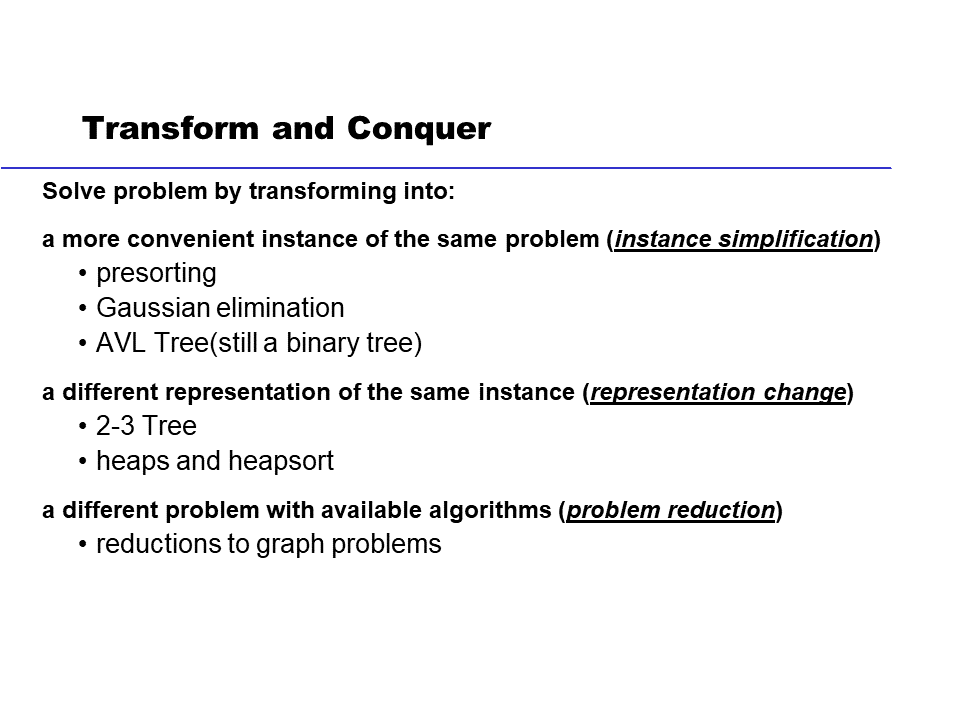

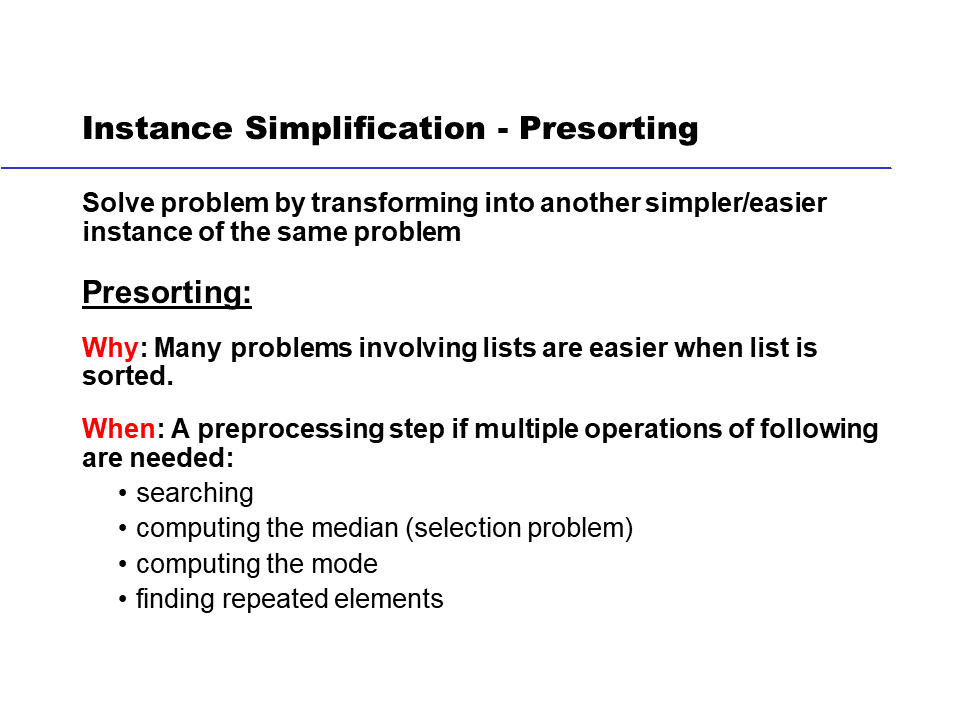

### Presorting for Searching an Array

#### Two ways to Search

- Sequential Search
    - $O(n)$
    - *unsorted*
- Binary Search
    - $O(\log n)$
    - *sorted*
    - Binary Search is *faster if input is sorted*

#### Cost of sorting?

- General, *comparison-based* sorting is $O(n\log n)$
    - Can assume any library sort is $O(n\log n)$
    - Cannot do better in general (see chapter 11 for information-theoretic argument why)  
    - Can do linear time in some situations (imagine if keys all 1-1000 over a million item array)

So, Presort to do binary search

In [223]:
import random

def rand_list(ct,start=0,step=1):
    xs = [x for x in range(start,start+ct*step,step)]
    random.shuffle(xs)
    return xs

def evens(ct):
    return rand_list(ct,2,2)

Note: Python Lists are "dynamic arrays" <a href="https://en.wikipedia.org/wiki/Dynamic_array">Wikipedia Link</a>

This is what Java ArrayLists and C++ vectors are too.

In [224]:
print(rand_list(10))

[4, 7, 6, 3, 5, 1, 9, 8, 2, 0]


In [225]:
print(rand_list(5,2,3))

[8, 11, 2, 5, 14]


Gen Random array (input) and then sort, $O(n\log n)$

In [226]:
xs = rand_list(10)
print(xs)
sxs = sorted(xs)
print('sorted:')
print(sxs)

[2, 6, 8, 1, 0, 3, 9, 5, 7, 4]
sorted:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [227]:
from  termcolor import colored

#input: sorted list of something comparable with <
#output: index of item searched for in input list or -1 if not present
def binary_search(x,xs):
    begin=0
    end=len(xs)-1 #length of xs
    while begin <= end:
        m = (begin+end)//2 # integer division
        pretty_bs(xs,x,begin,end,m) # for drawing, "pretty_X" will be my name for these functions
        y= xs[m]
        if x == y:
            return m
        elif y<x:
            begin = m+1
        else:
            end = m-1
    return -1


def pretty_bs(xs,target,begin,end,m):
    l = len(xs)
    print('[ ',end='')
    for i in range(l):   # range(l) is numbers 0,1..l-1 (not inclusive)
        if xs[i] == target:
            print(colored(xs[i],'yellow'),end = '')
        elif i==m:
            print(colored(xs[i],'green'),end = '')
        elif i>= begin and i<=end:
            print(colored(xs[i],'blue'),end = '')
        else:
            print(xs[i],end='')
        if(i< l-1): print(", ", end='')
    print(" ]")




In [228]:
i = binary_search(2,sxs)
print(i)

[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
2


In [229]:
es = evens(10)
print(es)

[2, 16, 6, 14, 4, 20, 18, 12, 10, 8]


In [230]:
ses = sorted(es)
print(ses)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [231]:
i = binary_search(16,ses)
print(i)

[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
7


In [232]:
i = binary_search(15,ses)
print(i)

[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
-1


In [233]:
big_evens = evens(25)
print(big_evens)

[28, 18, 12, 4, 32, 48, 16, 2, 40, 14, 6, 8, 26, 50, 10, 44, 38, 34, 24, 42, 22, 20, 30, 46, 36]


In [234]:
sbig_evens = sorted(big_evens)
print(sbig_evens)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]


In [235]:
i = binary_search(18,sbig_evens)
print(i)

[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50 ]
8


In [236]:
i = binary_search(11,sbig_evens)
print(i)

[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50 ]
-1


### Presorting for the Selection Problem $k^{th}$ order statistic
(order statistic is 1-indexed)

(also, pretend for a moment you don't know about QuickSelect...)

#### Brute Force Selection Problem?
Well, without duplicates, the $k^{th}$ order statistic will have $k$ items less than or equal to it in the input, so let us just count them.

In [237]:
#input: list of items without duplicates, returns kth order statistic
#output: kth order statistic
def bf_selection_no_duplicates(xs,k):
    for i in range(len(xs)):
        ct = 0
        for j in range(len(xs)):
            if xs[j] <= xs[i]:
                ct = ct + 1
        if ct == k:
            return xs[i]
    return None # k > len(xs) or k <1 or duplicates

In [238]:
xs = rand_list(10)
print( xs)

[8, 3, 9, 2, 7, 5, 0, 4, 1, 6]


Find the minimum

In [239]:
print(bf_selection_no_duplicates(xs,1))

0


Find the maximum

In [240]:
print(bf_selection_no_duplicates(xs,10))

9


Check that we caught a silly input 

In [241]:
print(bf_selection_no_duplicates(xs,100000000000000000))

None


Now, let's find the $5^{th}$ order statistic

In [242]:
print(bf_selection_no_duplicates(xs,5))

4


Let's Be Paranoid... setting up xs in different range

In [243]:
xs = rand_list(10,12,5)
print( xs)

[12, 37, 17, 47, 32, 22, 57, 52, 42, 27]


Let's look at that, sorted but keeping the original for use

In [244]:
sxs = sorted(xs)
print(sxs)

[12, 17, 22, 27, 32, 37, 42, 47, 52, 57]


Now, find the $5-th$ order statistic again

In [245]:
print(bf_selection_no_duplicates(xs,5))

32


Well, time to break it:

In [246]:
xs = rand_list(10) + [3,3,3,3]
random.shuffle(xs)
print(xs)


[5, 6, 8, 7, 3, 2, 3, 0, 3, 1, 9, 4, 3, 3]


(sorted...)

In [247]:
sxs = sorted(xs)
print(sxs)

[0, 1, 2, 3, 3, 3, 3, 3, 4, 5, 6, 7, 8, 9]


In [248]:
print(bf_selection_no_duplicates(xs,5))

None


...but the following works because k not in the range of some duplicates

In [249]:
print(bf_selection_no_duplicates(xs,10))

5


In [250]:
#input: list of items possibly WITH duplicates, returns kth order statistic
#output: kth order statistic
def bf_selection(xs,k):
    for i in range(len(xs)):
        ct = 0
        ct_equal = 0
        for j in range(len(xs)):
            if xs[j] < xs[i]:
                ct = ct + 1
            elif xs[j] == xs[i]:
                ct_equal = ct_equal + 1
        if ct+1 <= k and (ct+ct_equal) >=k:
            return xs[i]
    return None # k > len(xs) or k <1 or, possibly, duplicates

In [251]:
print(bf_selection(xs,1))

0


In [252]:
print(bf_selection(xs,10))

5


In [253]:
print(bf_selection(xs,10000))

None


In [254]:
print(bf_selection(xs,-10000))

None


Now, test the problem one.

In [255]:
print(sxs) # to prevent scorlling up and down

[0, 1, 2, 3, 3, 3, 3, 3, 4, 5, 6, 7, 8, 9]


In [256]:
print(bf_selection(xs,5))

3


In [257]:
print(bf_selection(xs,9))

4


In [258]:
print(bf_selection(xs,3))

2


In [259]:
print(bf_selection(xs,8))

3


In [260]:
print(bf_selection(xs,4))

3


TBD: AVL Trees

TBD: 2-3 Trees

TBD: Heaps

#### Reduction: Reduction of Least Common Multiple(LCM) to Greatest Common Divisor (GCD)

- The LCM is the smallest integer that is a multiple of each of the two input numbers
- To be a multiple of an integer, it has to have all the same factors as the integer, possilby times some integer.
- We can, of course, get a not-necessarily-least Common Multiple of two numbers by multiplying them.
- By the Fundamental Theorem of Arithmetic/Unique Factorization Theorem, each number has a unique factorization to the product of possibly multiple primes.
    - By computing the GCD, we can find the product of all the common factors (counting duplicates). 

In [261]:
def gcd(m,n):
    if(m>n):
        return gcd_helper(m,n)
    else:
        return gcd_helper(n,m)

In [262]:
def gcd_helper(m,n):
    if n == 0:
        return m
    return gcd_helper(n, m%n)

In [263]:
gcd(7,3)

1

In [264]:
gcd(3,7)

1

In [265]:
gcd(12,30)

6

- But for an integer $y$ to be a multiple of  a number $x$ it must have all the factors of $x$. 
- So, a $LCM(x,y)$ will be the product of 
    - $g=GCD(x,y)$ , product of all the the factors common to each
    - $x/g$ , product of all the factors of $x$ *not* in GCD
    - $y/g$ , product of all the factors of $y$ *not* in GCD
    - (any more factors and it will not be a *Least* Common Multiple)


In [266]:
def lcm(x,y):
    g = gcd(x,y)
    x_extra = x//g # // is integer division
    y_extra = y//g
    return g*x_extra*y_extra

In [267]:
lcm(12,9) # lcm( 2^2*3 ,3^2) 

36

In [268]:
lcm(5,7)

35

#### Branavan's idea of represeting this as a tree. 
I think I'll add Sieve of Eratosthenes so I can get the factors "easily".

In [269]:
def sieve_of_eratosthenes(n):
    ns = [n for n in range(2,n+1)]
    l = len(ns)
    for i in range (l):
        v = ns[i]
        if v is None:
            continue
        j = v*v - v + i #start at value*2, corrected for index
        while j < l:
            ns[j] = None
            j += v 
            
    return [n for n in ns if n is not None]

# testing code
primes = sieve_of_eratosthenes(40)
print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]


In [270]:
#input: an integer > 1
#output: the prime factors of that number
def prime_factors(n):
    primes = sieve_of_eratosthenes(n)
    i = 0
    factors = []
    while n > 1 and i < len(primes):
        if n%primes[i] == 0:
            n = n // primes[i]
            factors.append(primes[i])
        else:
            i += 1
    return factors            
    

In [271]:
#testing
prime_factors(8)


[2, 2, 2]

In [272]:
prime_factors(42)

[2, 3, 7]

In [273]:
prime_factors(37)

[37]

In [274]:
#input: two integers 
#output: triple of lists (common factors, unshared from m, unshared from n)
def find_common_factors(m, n):
    mfs = prime_factors(m)
    nfs = prime_factors(n)
    shared = []
    just_m = []
    #will remove from nfs and return that
    for mf in mfs:
        if mf in nfs:
            shared.append(mf)
            nfs.remove(mf)
        else:
            just_m.append(mf)
            
    return (shared,just_m,nfs)
    

In [275]:
find_common_factors(12,30)

([2, 3], [2], [5])

In [299]:

    
    
class factor_tree_node:
    def __init__(self, x, node_id,lchild=None,rchild=None): # this is a constructor
        self.val = x
        self.node_id=str(node_id)
        self.lchild=lchild
        self.rchild=rchild
        
def merge_ftn(node_id,ftn_left,ftn_right):
    return factor_tree_node(ftn_left.val*ftn_right.val,node_id,ftn_left,ftn_right)

from collections import deque

def nums2tree(ns,base_id):
    base_id=str(base_id)
    ftns = deque( [ factor_tree_node(ns[i],base_id+str(i)) for i in range(len(ns)) ] )
    i = len(ftns) # previous ids already used
    while(len(ftns)>1):
        x = ftns.popleft()
        y = ftns.popleft()
        ftns.append(merge_ftn(base_id + str(i) ,x, y))
        i += 1
    return ftns[0]

def print_lcm_tree(m,n):
    print('m='+str(m))
    print('n='+str(n))
    (shared,just_m,just_n) = find_common_factors(m,n)
    if len(shared) == 0:
        shared = [1]
    if len(just_m) == 0:
        just_m = [1]
    if len(just_n) == 0:
        just_n = [1]
        
    mtree = nums2tree(just_m,'m')
    ntree = nums2tree(just_n,'n')
    stree = nums2tree(shared,'s')
    
    dot = Digraph("LCM factor tree for "+str(m)+" and "+str(n))
    
    def tree2dot(tree, d, parent = None, root_xlabel=None):
        if tree is None:
            return
        attributes = {'label':str(tree.val),'id':str(tree.node_id)}
        if parent is None and root_xlabel is not None:
            attributes["label"] = attributes["label"]+"\n"+str(root_xlabel)
        d.node(tree.node_id,**attributes)
        if parent is not None:
            d.edge(parent.node_id,tree.node_id)
        tree2dot(tree.lchild,d,tree)
        tree2dot(tree.rchild,d,tree)
    
    tree2dot(mtree,dot)
    tree2dot(stree,dot,root_xlabel='(GCD)')
    tree2dot(ntree,dot)
    
    justmgcd = mtree.val*stree.val
    lcm3 = mtree.val*stree.val*ntree.val
    justngcd = ntree.val*stree.val
    
    dot.node('justmgcd', label=str(justmgcd)+"\n(m)")
    dot.edge('justmgcd', mtree.node_id)
    dot.edge('justmgcd', stree.node_id)
    
    dot.node('lcm3', label=str(lcm3)+"\n(LCM)")
    dot.edge('lcm3', mtree.node_id)
    dot.edge('lcm3', stree.node_id)
    dot.edge('lcm3', ntree.node_id)
    
    dot.node('justngcd', label=str(justngcd)+"\n(n)")
    dot.edge('justngcd', ntree.node_id)
    dot.edge('justngcd', stree.node_id)
    
    display(dot)
        



m=37
n=91


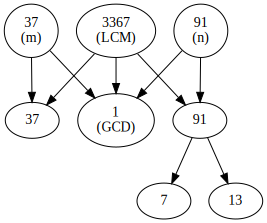

In [302]:
print_lcm_tree(37,91)

In [186]:
print_tree(12,30)

In [116]:
str('fred')

'fred'

#### Reduction: Paths of length $n$ in an $m$-node graph to matrix multiplication (raising an $m\times m$ matrix $A$ to $A^n$ )
- The adjacency matrix can be thought of as encoding all length one paths

##### (helper code)

[0, 1, 2]
[[0 0 1]
 [0 0 0]
 [0 0 0]]
[[0 0 1]
 [0 0 0]
 [0 1 0]]
adding random edges...
[[0 0 1]
 [0 0 0]
 [0 1 0]]
[[0 0 1]
 [0 0 0]
 [0 1 0]]
[[0 0 1]
 [0 0 0]
 [0 1 0]]
[[0 0 1]
 [0 0 0]
 [0 1 0]]
[[0 0 1]
 [0 1 0]
 [0 1 0]]
[[0 0 1]
 [0 1 1]
 [0 1 0]]
[[0 0 1]
 [0 1 1]
 [0 1 0]]
[[0 0 1]
 [0 1 1]
 [0 1 0]]
[[0 0 1]
 [0 1 1]
 [0 1 0]]


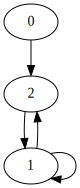

[[0 0 1]
 [0 0 1]
 [0 1 0]]


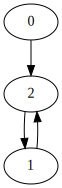

In [126]:


def random_weakly_connected_digraph(n, adj_prob=0.2, debug=False):
    A = np.zeros((n,n),dtype=np.int32)
    labels = [ x for x in range(0,n) ] # list comprehension -- read like { x | x in {0..n-1} }

    if debug:
        print(labels)
    
    rlbls = labels[:] #copy lists
    random.shuffle(rlbls) 
    
    #connect the digraph (weakly)
    for i in range(0, len(rlbls)-1):
        A[rlbls[i],rlbls[i+1] ] =1
        if debug:
            print(A)
    
    if debug:
        print('adding random edges...')
    #randomly add edges
    for r in labels:
        for c in labels:
            if random.random() <= adj_prob:
                A[r,c] = 1
            if debug:
                print(A)
    return A

A = random_weakly_connected_digraph(3,debug=True)

def draw_digraph(G,diffG=None):
    dot = Digraph()
    
    labels = [ x for x in range(0, G.shape[0]) ]
    
    for l in labels:
        dot.node(str(l))
        
    for r in labels:
        for c in labels:
            if G[r,c]>0:
                dot.edge(str(r),str(c))
                
    if diffG is not None:
        for r in labels:
            for c in labels:
                if diffG[r,c]>0 and G[r,c] == 0:
                    attribs = {'style':'dashed',}
                    dot.edge(str(r),str(c),**attribs)

    display(dot)
    
    
draw_digraph(A)

def graph_labels(G):
    return [ x for x in range(0, G.shape[0]) ]

def zero_diagonal(G):
    labels = graph_labels(G)
    for l in labels:
        G[l,l]=0
    return G

zero_diagonal(A)
print(A)
draw_digraph(A)
        
    

Okay, so, let's get a graph:

In [129]:
G = random_weakly_connected_digraph(4,0.4)
G = zero_diagonal(G)

What does G look like?


[[0 0 1 0]
 [1 0 0 1]
 [1 0 0 0]
 [1 1 1 0]]


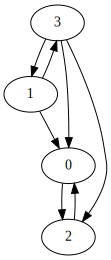

In [130]:
print(G)
draw_digraph(G)

So, back to regularly scheduled programming...

*What does $G^2$ look like?*

In [131]:
G2 = np.matmul(G,G)

In [132]:
print(G2)
print('for comparison purposes, here\'s G')
print(G)


[[1 0 0 0]
 [1 1 2 0]
 [0 0 1 0]
 [2 0 1 1]]
for comparison purposes, here's G
[[0 0 1 0]
 [1 0 0 1]
 [1 0 0 0]
 [1 1 1 0]]


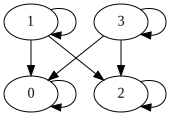

for comparison purposes, here's G, graphically


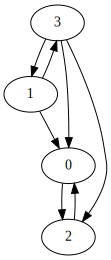

In [134]:
draw_digraph(G2)
print('for comparison purposes, here\'s G, graphically')
draw_digraph(G)

You should notice that the graph $G^2$ shows all the length-2 paths as edges.

(these graphs are randomized so just do Cell->Run All until you see it, some graphs are better than others)

Why is this? 

Let's create a new graph $G$ with more edges:

[[0 1 0 1 0]
 [1 1 1 1 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [1 1 0 1 1]]


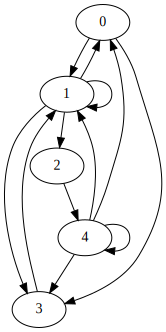

In [143]:
G=random_weakly_connected_digraph(5,0.5)
print(G)
draw_digraph(G)

So, when you inner-product row 0 by column 1

In [144]:
row0 = G[0,:] # everything on first row
col1 = G[:,1] # everything in first column
print('reading the matrix as row-"from" to column-"to"')
print('row0 = '+str(row0))
print('col1 = '+str(col1))
innerp = np.inner(row0,col1)
print("inner product = " + str(innerp))

reading the matrix as row-"from" to column-"to"
row0 = [0 1 0 1 0]
col1 = [1 1 0 1 1]
inner product = 2


(above, again, on different row/cols in case of bad luck)

In [145]:
row = G[1,:] # everything on third row
col3 = G[:,3] # everything in first column
print('reading the matrix as row-"from" to column-"to"')
print('row = '+str(row))
print('col3 = '+str(col3))
innerp = np.inner(row,col3)
print("inner product = " + str(innerp))

reading the matrix as row-"from" to column-"to"
row = [1 1 1 1 0]
col3 = [1 1 0 0 1]
inner product = 2


This is why this gives you the number of length-2 paths from one vertex to another.

So, if you multiply it again, you'll get all the number length-3 paths between each pair of edges...

So this is reducing the problem of counting the number of paths in a graph (in adjacency matrix form) to matrix multiplication. Reductions are fundumentally conversion algorithms that allow you to use *other* algoirthms.

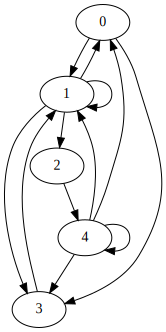

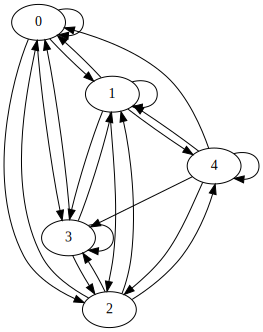

In [147]:
G2=np.matmul(G,G)
draw_digraph(G)
draw_digraph(G2)



Incidentally, matrix exponentiation can be used for other things... 

Consider:

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


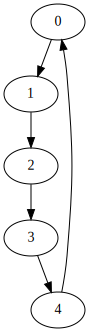

In [149]:
G = np.zeros((5,5))
G[0,1]=1
G[1,2]=1
G[2,3]=1
G[3,4]=1
G[4,0]=1
print(G)
draw_digraph(G)

Consider powers of this matrix:

0
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


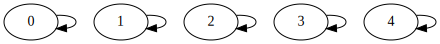

1
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


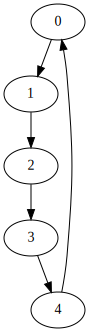

2
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


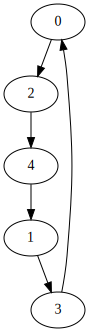

3
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


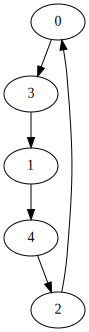

4
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


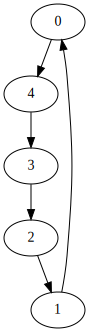

5
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


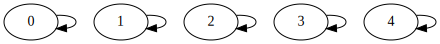

In [151]:
GP=np.identity(5) # identity matrix - ones on the diagonal
for i in range(5+1):
    print(i)
    print(GP)
    draw_digraph(GP)
    GP = np.matmul(G,GP)


Ignoring, the first one, do you see how to use this? How about this similar one?

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


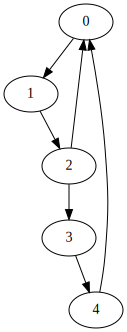

0
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


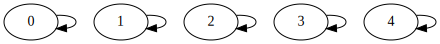

1
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


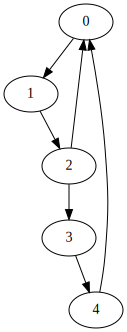

2
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


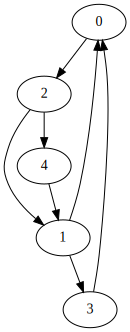

3
[[1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


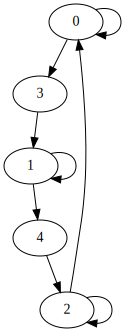

4
[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]]


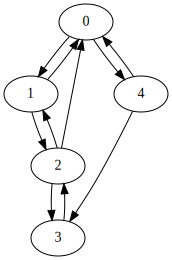

5
[[1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1.]]


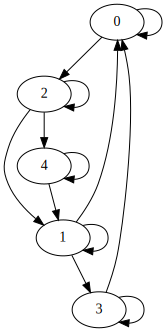

In [153]:
G = np.zeros((5,5))
G[0,1]=1
G[1,2]=1
G[2,3]=1
G[2,0]=1 # the difference
G[3,4]=1
G[4,0]=1
print(G)
draw_digraph(G)

GP=np.identity(5) # identity matrix - ones on the diagonal
for i in range(5+1):
    print(i)
    print(GP)
    draw_digraph(GP)
    GP = np.matmul(G,GP)

Notice that cycles will appear on the *diagonal*.

Now, let's look at something related. The problem here is to find the **transitive closure**. A transitive closure on a graph will tell you if there exists a *path* between a pair of vertices. This is almost identical to the task we just solved except that we don't care about the number of paths, just the existence of one. 

So, let's consider *adding* the matrices we find with successive powers. We'll start with $R_0$, the original adjacency matrix and go until we reach $R_{\lvert V\rvert}$, where $\lvert V\rvert$ is the number of vertices. 

R0=
[[0 1 0 0]
 [0 1 0 1]
 [1 0 0 1]
 [0 0 0 0]]


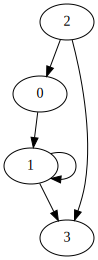

R1:
[[0 2 0 1]
 [0 2 0 2]
 [1 1 0 1]
 [0 0 0 0]]


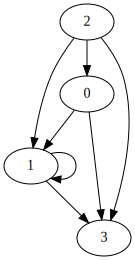

R2:
[[0 3 0 2]
 [0 3 0 3]
 [1 2 0 2]
 [0 0 0 0]]


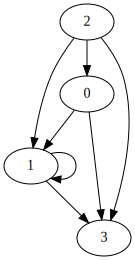

R3:
[[0 4 0 3]
 [0 4 0 4]
 [1 3 0 3]
 [0 0 0 0]]


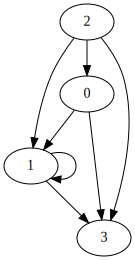

R4:
[[0 5 0 4]
 [0 5 0 5]
 [1 4 0 4]
 [0 0 0 0]]


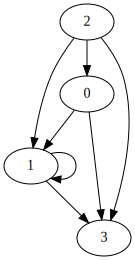

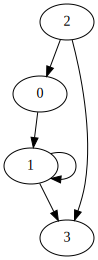

In [158]:
R0 = random_weakly_connected_digraph(4)

def mult_and_add(R0):
    print('R0=')
    print(R0)
    draw_digraph(R0)
    labels = graph_labels(R0)
    R=R0
    for i in range(1,len(labels)+1):
        R=np.matmul(R,R0)
        R=np.add(R,R0)
        print('R'+str(i)+':')
        print(R)
        draw_digraph(R)
    return R
        
R4 = mult_and_add(R0)
draw_digraph(R0)
    

(by adding the original matrix, repeatedly, we are not forgetting the existence of previous paths found... the numbers however are less helpful)

Let's try a different graph G:

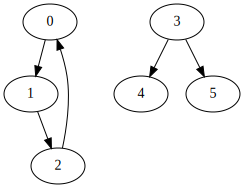

In [160]:
G = np.zeros((6,6),dtype=np.int)
G[0,1]=1
G[1,2]=1
G[2,0]=1
G[3,4]=1
G[3,5]=1

draw_digraph(G)

mult and add...

R0=
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


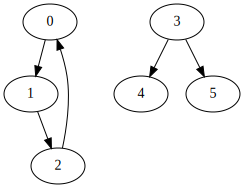

R1:
[[0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 0 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


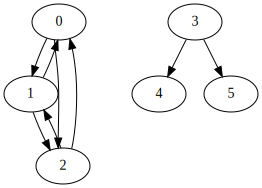

R2:
[[1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


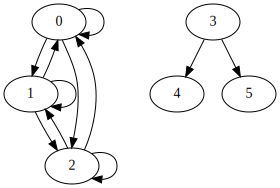

R3:
[[1 2 1 0 0 0]
 [1 1 2 0 0 0]
 [2 1 1 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


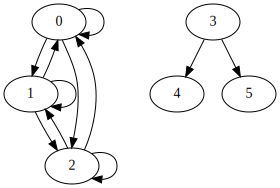

R4:
[[1 2 2 0 0 0]
 [2 1 2 0 0 0]
 [2 2 1 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


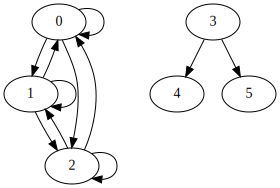

R5:
[[2 2 2 0 0 0]
 [2 2 2 0 0 0]
 [2 2 2 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


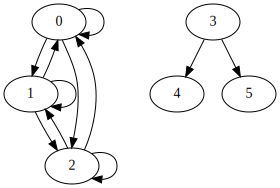

R6:
[[2 3 2 0 0 0]
 [2 2 3 0 0 0]
 [3 2 2 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


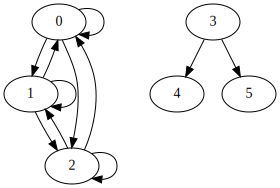

In [162]:
H = mult_and_add(G)

Well, let's forget the counts. They aren't necessary for *transitive closure*

In [169]:
def to_transitive_closure(G):
    TC = G.copy()
    labels = graph_labels(TC)
    for r in labels:
        for c in labels:
            if TC[r,c] > 0:
                TC[r,c] = 1
    return TC
                

In [170]:
TC_R4 = to_transitive_closure(R4)
print(TC_R4)

[[0 1 0 1]
 [0 1 0 1]
 [1 1 0 1]
 [0 0 0 0]]


In [171]:
TC_H = to_transitive_closure(H)
print(TC_H)

[[1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


How efficient is this?

Matrix multiplication on a $n\times n$ square matrix is $O(n^3)$ and we do $n$ of them... ($n==\lvert V \rvert$)

so $O(n^4)$

We, at least, don't have to consder paths longer than $\lvert V \rvert$ for this problem. *Why*?


Let's look at $G$ again:

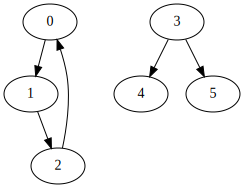

[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [181]:
draw_digraph(G)
print(G)

If we look at row 0 here, then we can see/remember that this is all the nodes that vertex 0 can reach accross one edge. 

In [182]:
print(G[0,:])

[0 1 0 0 0 0]


Now, subtley differently, consider the *column* 0 alongside it

In [183]:
print(G[:,0])

[0 0 1 0 0 0]


The column shows all nodes that can reach 0 across one edge. This shows that there is a *path* from 2 to 1 through 0. So, since this is obviously useful for the transitive closure, let's add it.

In [184]:
G[2,1] = 1
print(G)

[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 1 0 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


Thus, we have added all length-2 paths through 0 to G.
Now, let's consider row/column 1.

In [179]:
print('row-1: ',end='')
print(G[1,:])
print('col-1: ',end='')
print(G[:,1])


row-1: [0 0 1 0 0 0]
col-1: [1 0 1 0 0 0]


Since vertex 0 and 2 can reach 1 and vertex 1 can reach 2, that means there are *paths* through vertex 1 to vertex 2. Very importantly, this path through vertex 1 *inculudes the path through vertex 0* we found before. If we carry this forward we can define it like this, call it Warshalls (for some reason...) and get the transitive closure in $O(n^3)$ time.

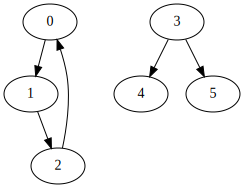

In [185]:
# resetting G
G = np.zeros((6,6),dtype=np.int)
G[0,1]=1
G[1,2]=1
G[2,0]=1
G[3,4]=1
G[3,5]=1

draw_digraph(G)

[[1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


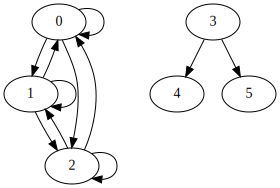

In [187]:
def Warshall(R0):
    labels = graph_labels(R0)
    R=R0.copy()
    for k in labels:
        for i in labels:
            for j in labels:
                R[i,j] = R[i,j] or (R[i,k] and R[k,j]) # python allows implicit conversion Boolean -> Int
    return R
        
    
    
R6 = Warshall(G)
print(R6)
draw_digraph(R6)

Adding the *paths* through nodes to the original can be thought of as adding *virtual* edges. Let's see those.

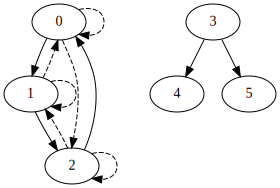

In [189]:
draw_digraph(G,diffG=R6)

Let's do that again, except on a random weakly connected graph:

G0
[[0 0 1 1]
 [0 0 0 0]
 [0 1 1 0]
 [0 0 1 0]]


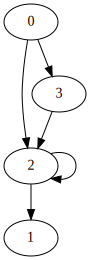

[[0 1 1 1]
 [0 0 0 0]
 [0 1 1 0]
 [0 1 1 0]]


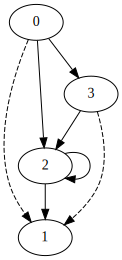

In [191]:
G0 = random_weakly_connected_digraph(4)
print("G0\n"+str(G0))
draw_digraph(G0)
G6 = Warshall(G0)
print(G6)
draw_digraph(G0,diffG=G6)

We can even modify this to get all-pairs shortest distance (length of shortest path on a weighted graph)

[[2147483647 2147483647 2147483647 2147483647]
 [         5 2147483647 2147483647          4]
 [2147483647 2147483647          2          2]
 [         1          5 2147483647 2147483647]]


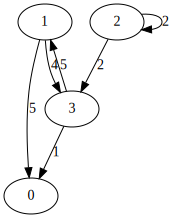

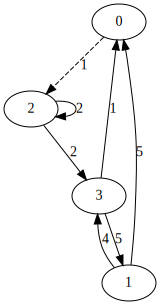

In [192]:
inf = np.iinfo(np.int32).max # yes, kind of like a global variable...

def random_wkly_conn_weighted_digraph(n):
    G = random_weakly_connected_digraph(n)
    labels = graph_labels(G)
    for r in labels:
        for c in labels:
            if G[r,c] == 0:
                G[r,c] = inf
            else:
                G[r,c] = random.randint(1,5)
    return G
                
def draw_weighted_digraph(G,diffG=None):
    dot = Digraph()
    
    labels = [ x for x in range(0, G.shape[0]) ]
    
    for l in labels:
        dot.node(str(l))
        
    for r in labels:
        for c in labels:
            if G[r,c]< inf:
                dot.edge(str(r),str(c), label=str(G[r,c]))
                
    if diffG is not None:
        for r in labels:
            for c in labels:
                if diffG[r,c]<inf and G[r,c] > diffG[r,c]:
                    attribs = {'style':'dashed',}
                    dot.edge(str(r),str(c),label=str(diffG[r,c]),**attribs)

    display(dot)

# JUST TESTING    
G=random_wkly_conn_weighted_digraph(4)
print(G)
draw_weighted_digraph(G)

G1 = G.copy()
G1[0,2] = 1
G1[1,3] = 6
draw_weighted_digraph(G, diffG=G1)


So, back to regularly scheduled programming:

Let's do another algorithm (called "Floyd's")

Incidentally, this is an unfortunate bit of of confusion. Floyd was the grad student of Warshall so you find various names for these two algorithms and somethimes "Warshall-Floyd's".

D0


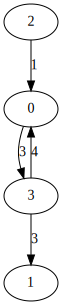

D4


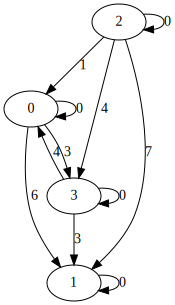

D0-D4 difference


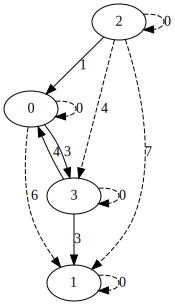

In [194]:
def Floyd(D0):
    labels = graph_labels(D0)
    D=D0.copy()
    
    #zero the diagonal -- is a DISTANCE matrix (each node is 0 distance from itself)
    for k in labels:
        D[k,k] = 0
    
    for k in labels:
        for i in labels:
            for j in labels:
                if(D[i,k] <inf and D[k,j]<inf):
                    D[i,j] = min(D[i,j] , D[i,k]  + D[k,j] )
    return D

D0 = random_wkly_conn_weighted_digraph(4)
D4 = Floyd(D0)
print('D0')
draw_weighted_digraph(D0)
print('D4')
draw_weighted_digraph(D4)
print('D0-D4 difference')
draw_weighted_digraph(D0,diffG=D4)


Running on weighted old friend above:




In [ ]:
G0 = np.ones((6,6),dtype=np.int32)
G0.fill(inf)
G0[0,1]=1
G0[1,2]=2
G0[2,0]=3
G0[3,4]=4
G0[3,5]=5

draw_weighted_digraph(G0)

In [ ]:
G4 = Floyd(G0)
draw_weighted_digraph(G4)
print(G4)